In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data='/content/drive/MyDrive/Chocolate Sales.csv'

df=pd.read_csv(data)

In [5]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [6]:
df.shape

(1094, 6)

**Handling Null Values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [8]:
df.isnull().sum()   # No null value found in the dataset

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


**Handling Duplicates**

In [9]:
df.duplicated().sum()   # No duplicated value found  in the Dataset

0

 **Feature Engineering**

In [10]:
df['Amount']=df['Amount'].replace({'\$': '', ',': ''},regex=True)

In [11]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


In [12]:
df.dtypes

,0
Sales Person,object
Country,object
Product,object
Date,object
Amount,object
Boxes Shipped,int64


In [44]:
# df['Date'] = (df['Date'] - pd.timestamp("1970-01-01"))

AttributeError: module 'pandas' has no attribute 'timestamp'

In [14]:
df.dtypes

,0
Sales Person,object
Country,object
Product,object
Date,object
Amount,object
Boxes Shipped,int64


**EDA**

In [15]:
df['Amount']=pd.to_numeric(df['Amount'])

In [16]:
cat_cols=df.dtypes[df.dtypes=='object'].index
int_cols=df.dtypes[df.dtypes!='object'].index

In [17]:
print(cat_cols)
print(int_cols)

Index(['Sales Person', 'Country', 'Product', 'Date'], dtype='object')
Index(['Amount', 'Boxes Shipped'], dtype='object')


In [18]:
for i in df:
  print(i)
  print(df[i].nunique())
  print('*******************************')

Sales Person
25
*******************************
Country
6
*******************************
Product
22
*******************************
Date
168
*******************************
Amount
827
*******************************
Boxes Shipped
385
*******************************


In [19]:
plot=['Country','Sales Person']
plot

['Country', 'Sales Person']

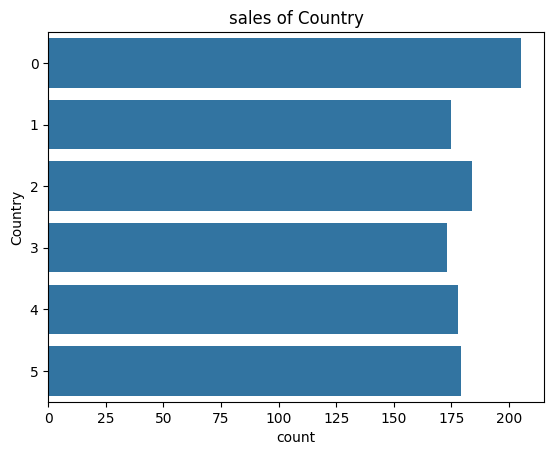

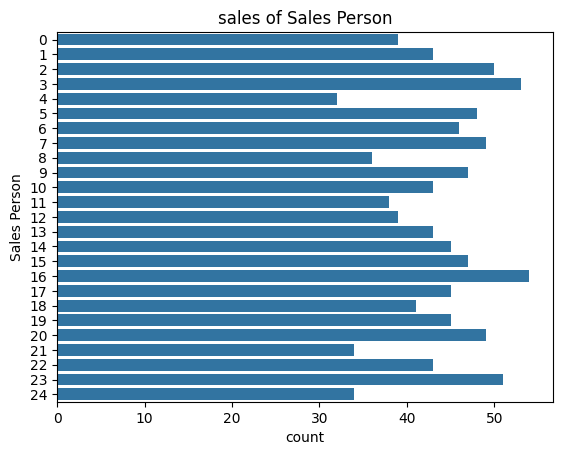

In [48]:
for i in plot:
  sns.countplot(y=df[i])
  plt.title(f'sales of {i}')
  plt.show()

In [21]:
corr=df[int_cols].corr()

<Axes: >

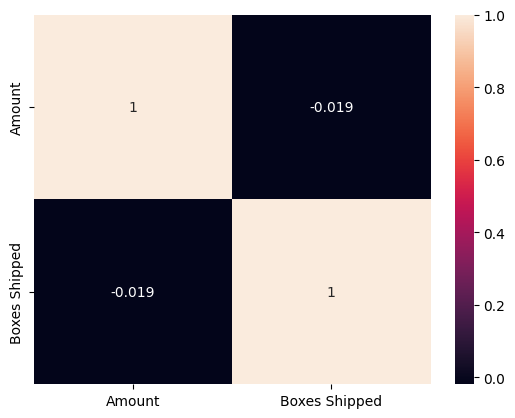

In [22]:
sns.heatmap(corr,annot=True)


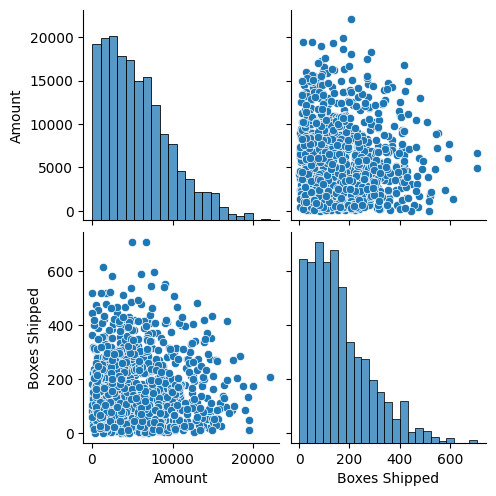

In [23]:
sns.pairplot(df)

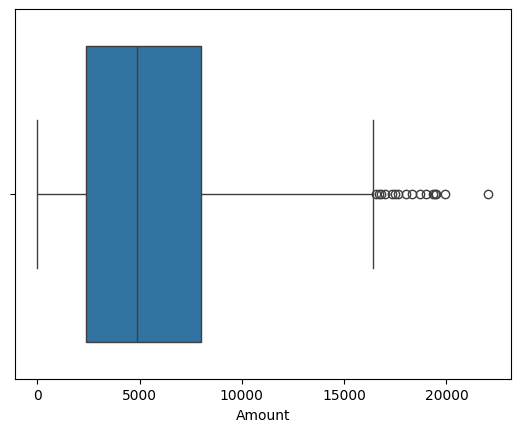

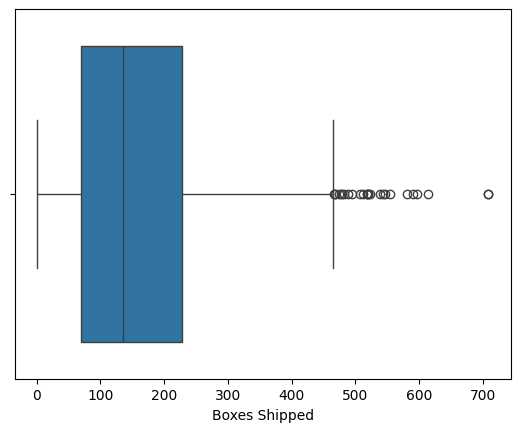

In [24]:
for i in int_cols:
  sns.boxplot(x=df[i])
  plt.show()


In [25]:
upper=['Boxes Shipped' , 'Amount']

In [26]:
for i in upper:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  print(i)
  df[i]=np.where(df[i]>upper_bound,upper_bound,df[i])

Boxes Shipped
Amount


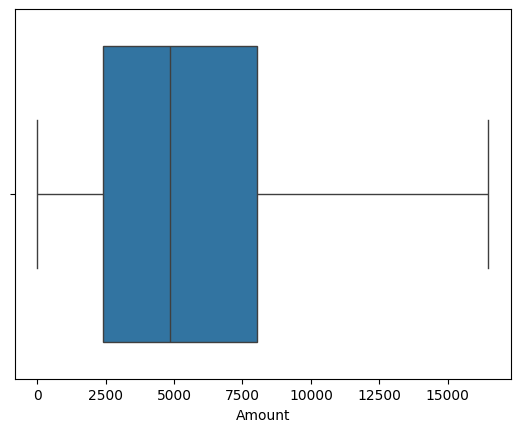

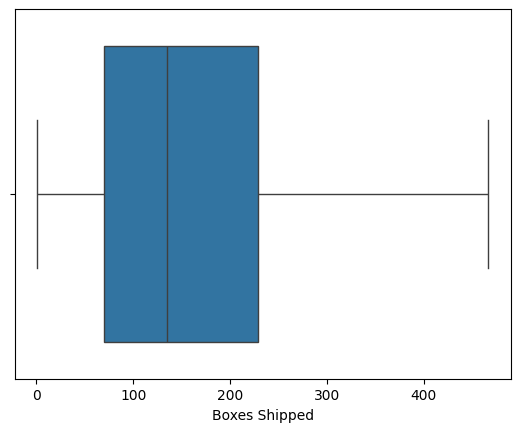

In [27]:
for i in int_cols:
  sns.boxplot(x=df[i])
  plt.show()

In [28]:
int_cols

Index(['Amount', 'Boxes Shipped'], dtype='object')

**Checking Normality of Target Variable**

<ipython-input-49-154ae1203326>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],kde=True)


<Axes: xlabel='Amount', ylabel='Density'>

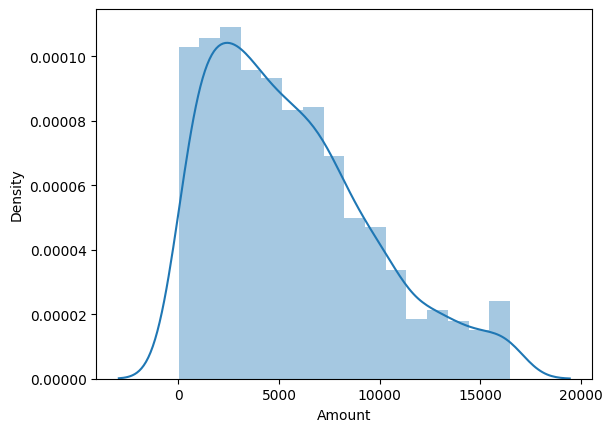

In [49]:
sns.distplot(df['Amount'],kde=True)

**Label encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
for i in cat_cols:
  df[i]=lb.fit_transform(df[i])

In [33]:
df.dtypes

,0
Sales Person,int64
Country,int64
Product,int64
Date,int64
Amount,float64
Boxes Shipped,float64


**Defining X and Y**

In [34]:
x=df.drop('Amount',axis=1)
y=df['Amount']
print(x.shape)
print(y.shape)

(1094, 5)
(1094,)


In [35]:
# from sklearn.preprocessing import StandardScaler

# # Features standarization
# scaler = StandardScaler()  # Create an instance
# x_scaled = scaler.fit_transform(x)


**Spliting data in train and test**

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.02,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 5)
(1073, 5)
(21,)
(1073,)


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
def evalmodel(y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2_sc=r2_score(y_test,y_pred)
  rmse=np.sqrt(mse)

  print('MSE', mse)
  print('MAE', mae)
  print('r2_sc', r2_sc)
  print('rmse', rmse)


def score(model):
  print('train_score',model.score(x_train,y_train))
  print('test_score',model.score(x_test,y_test))

In [41]:
score(lr)

train_score 0.1818779585610789
test_score -0.4975546123322163


In [42]:
y_pred=lr.predict(x_test)
evalmodel(y_test,y_pred)

MSE 23886810.388643056
MAE 3882.99310292793
r2_sc -0.4975546123322163
rmse 4887.413466102807
